In [1]:
#Import numpy, pandas etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import CSV file
df = pd.read_csv(r"C:\Users\JonathanRau\OneDrive - Arkwright Consulting AG\Desktop\haspa_marathon_2018_2023.csv", sep = ",", engine = "python", encoding = "utf-8")

In [3]:
df


,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Brutto,Url_IDP,Year
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,02:04:09,02:04:09,84VSK2IQ371AD3&lang,2023
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),02:04:33,02:04:33,84VSK2IQ371ADE&lang,2023
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,02:06:18,02:06:18,84VSK2IQ371AD6&lang,2023
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),02:07:06,02:07:06,84VSK2IQ371AD5&lang,2023
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),02:08:08,02:08:08,84VSK2IQ371AE8&lang,2023
...,...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,M / W 45 1969-1973,06:12:56,06:23:56,99999915DBE17C00002DEC05&lang,2018
28748,7651,1026,"Koepke, Martin (GER)",7099,–,M / W 35 1979-1983,06:13:22,06:18:10,99999915DBE17400002B7B1B&lang,2018
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,M / W 60 1954-1958,06:13:53,06:14:04,99999915DBE17C00002E6DE1&lang,2018
28750,7653,36,"Lesiak, Jan (GER)",16184,–,M / W 70 1944-1948,06:13:57,06:21:29,99999915DBE17C00002E74BB&lang,2018


In [4]:
#Drop columns we don't need:
df.drop(columns=["Url_IDP"], inplace=True)

In [5]:
df.dtypes

#Column explanation:
#Platz = rank for respective race year (not sure if this is on "brutto"- or "netto" time)
#Pl.AK = rank for respective year and age group
#Name = runners name
#Startnr. = startnumber for respective year (--> could be a good unique identifier together with year)
#Verein/Team = optional field to enter training group/represented team
#AK = Age group in intervalls
#Finish = "Netto" time
#Brutto = "Brutto" time
#Year = Year of the race

#Important: "Brutto" is the time between the start sign was given until the runner approaches the goal; however, for us the Finish time ("Netto") is more relevant because this takes into account if the runner was rather at the back of his starting group (so it measures the exact time required to finish the respective distance)

Platz           int64
Pl.AK          object
Name           object
Startnr.       object
Verein/Team    object
AK             object
Finish         object
Brutto         object
Year            int64
dtype: object

In [6]:
#Convert "Finish" column into datetime in order to make computations with this columns (not sure if there is a better way, because datatime will also assign a date to this column)

df["Finish"] = pd.to_datetime(df["Finish"], format = "%H:%M:%S")
df

,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Brutto,Year
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,1900-01-01 02:04:09,02:04:09,2023
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:04:33,02:04:33,2023
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,1900-01-01 02:06:18,02:06:18,2023
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:07:06,02:07:06,2023
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:08:08,02:08:08,2023
...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,M / W 45 1969-1973,1900-01-01 06:12:56,06:23:56,2018
28748,7651,1026,"Koepke, Martin (GER)",7099,–,M / W 35 1979-1983,1900-01-01 06:13:22,06:18:10,2018
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,M / W 60 1954-1958,1900-01-01 06:13:53,06:14:04,2018
28750,7653,36,"Lesiak, Jan (GER)",16184,–,M / W 70 1944-1948,1900-01-01 06:13:57,06:21:29,2018


In [7]:
#Check if datetime transformation worked
(df["Finish"].loc[2])-(df["Finish"].loc[1])

Timedelta('0 days 00:01:45')

In [8]:
#Compute mean for Finish time (double check if this is true)
df["Finish"].mean()

Timestamp('1900-01-01 04:00:03.871208704')

In [9]:
#Group data by year of race:
raceyear_grp = df.groupby(["Year"])

In [10]:
#Test grouping:
raceyear_grp["Finish"].agg(["median", "mean"])

,median,mean
Year,,
2018,1900-01-01 04:02:44.500,1900-01-01 04:06:03.904755712
2019,1900-01-01 03:54:05.000,1900-01-01 03:56:21.914598144
2021,1900-01-01 03:59:00.000,1900-01-01 04:02:10.182486016
2022,1900-01-01 03:54:28.000,1900-01-01 03:57:15.250735616
2023,1900-01-01 03:56:47.000,1900-01-01 03:59:06.720916224


In [11]:
#Test grouping:
raceyear_grp.get_group(2023)

,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Brutto,Year
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,1900-01-01 02:04:09,02:04:09,2023
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:04:33,02:04:33,2023
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,1900-01-01 02:06:18,02:06:18,2023
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:07:06,02:07:06,2023
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:08:08,02:08:08,2023
...,...,...,...,...,...,...,...,...,...
6588,6589,959,"Jaster, Daniel (GER)",15590,–,M/W 30 1989-1993,1900-01-01 06:20:09,06:27:36,2023
6589,6590,329,"Hetzel, Hans-Jürgen (GER)",14433,100 Marathon Club,M/W 60 1959-1963,1900-01-01 06:22:46,06:27:48,2023
6590,6591,37,"Bülk, Jürgen (GER)",13425,–,M/W 70 1949-1953,1900-01-01 06:22:56,06:33:30,2023
6591,6592,871,"Heinrich, Christoph (GER)",15168,–,M/W 45 1974-1978,1900-01-01 06:23:23,06:33:44,2023


In [12]:
df["AK"].value_counts()

M / W 50 1964-1968    1279
M / W 45 1969-1973    1262
M / W 50 1965-1969    1234
M / W 45 1970-1974    1210
M / W 40 1974-1978    1143
                      ... 
M/W 80 1939-1943         4
M / W 80 1935-1939       3
M/W 85 1934-1938         1
M/W 80 1938-1942         1
M / W 80 1934-1938       1
Name: AK, Length: 63, dtype: int64

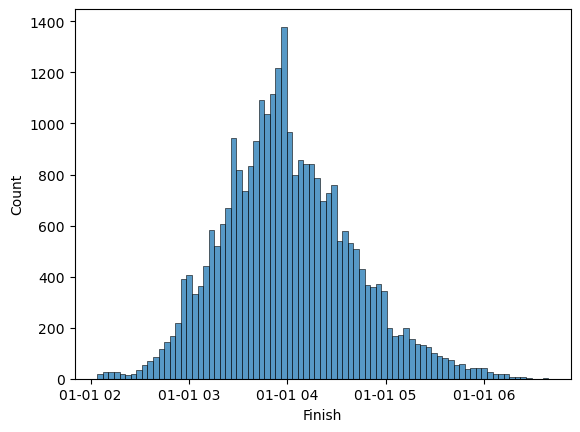

In [13]:
#Create simple histograms:
sns.histplot(data=df, x="Finish")
plt.show()